In [173]:
from sklearn import preprocessing
import numpy as np

In [195]:
filename = "material/GlobClus_prop.limpio.dat"
data = np.genfromtxt(filename,unpack=True,skip_header=1,usecols=(5,6,7,8,9,10,11,12,13,14,15,16,17))

data = data.T

In [196]:
data_scaled = preprocessing.scale(data)

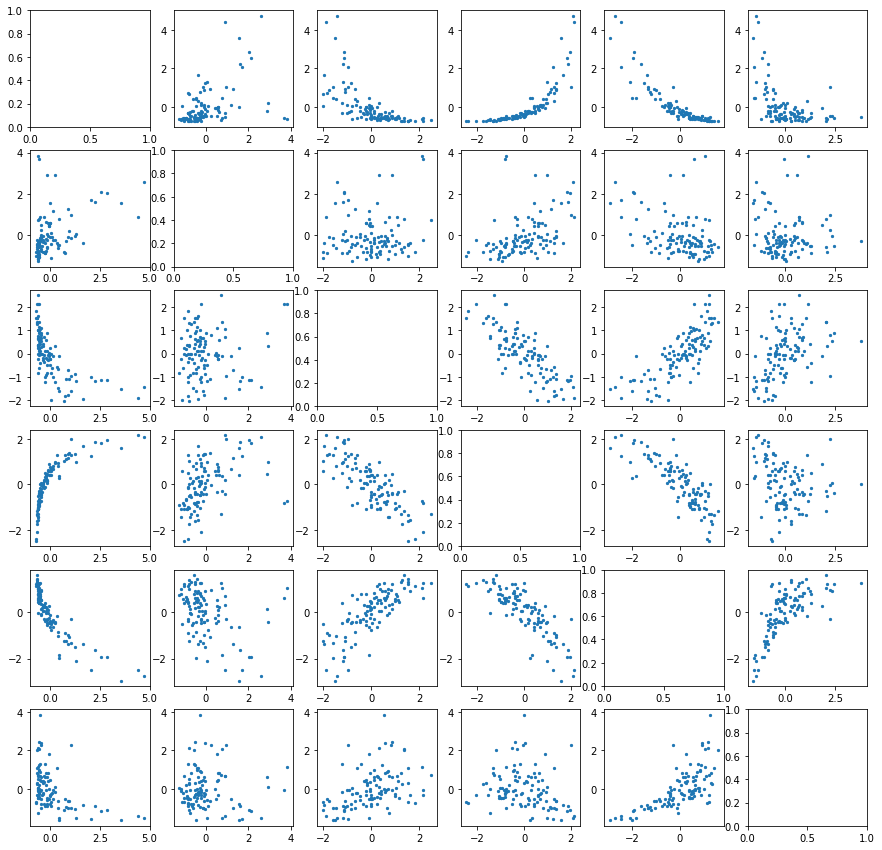

In [197]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

dyn = data_scaled.T

nrow = 6; ncol = 6;
fig, axs = plt.subplots(nrows=nrow, ncols=nrow,figsize=(15,15))
axs = np.array(axs)

for i in range(6):
    for j in range(6):
        if i == j:
            continue
        axs[j][i].scatter(dyn[i+2],dyn[j+2],s=5)

In [177]:
scaler = preprocessing.StandardScaler().fit(data)

print scaler
print scaler.mean_
print scaler.var_

StandardScaler(copy=True, with_mean=True, with_std=True)
[ -1.41369369  -7.40405405   1.72612613  39.67387387   1.53702703
   8.08837838   3.68873874   6.18018018  24.87837838  16.5245045
   0.30522523]
[  2.57535005e-01   1.53544573e+00   4.73994806e+00   7.15141750e+02
   1.62258729e-01   5.52653226e-01   1.56272634e+00   1.13463009e+01
   1.99783316e+02   2.06229142e+00   9.77600844e-02]


(111, 13)
[  4.61761502e-01   1.98768206e-01   1.20661287e-01   1.04756547e-01
   5.91099808e-02   2.57138882e-02   1.56476856e-02   8.53956223e-03
   4.86273689e-03   1.22837593e-04   5.01828291e-05   5.58349049e-06
   8.32935664e-33]


<BarContainer object of 13 artists>

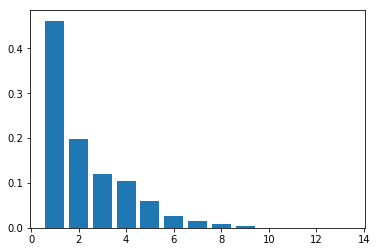

In [201]:
from sklearn import decomposition

print data_scaled.shape

pca = decomposition.PCA(n_components=13)
pca.fit(data_scaled)
var = pca.explained_variance_ratio_
print(var)
plt.bar(np.arange(1,14),var)

In [202]:
V = pca.components_

In [203]:
Y = pca.transform(data_scaled)
print Y.shape

(111, 13)


(111,)


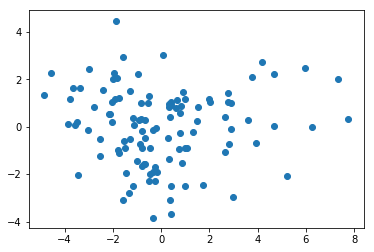

In [205]:
xx = (Y.T)[0]
yy = (Y.T)[1]
print xx.shape
plt.scatter(xx,yy)
